In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [20]:
%matplotlib inline

In [21]:
customers = pd.read_csv("ecommerce_customers.csv")

In [44]:
customers.head()

,Email,Address,membership_image,mean_session_length,time_spent_app,time_spent_website,length_of_membership,annual_amount_spend
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [43]:
# baraye in asami columns hhara taghir midahim ke ham ba video amoozeshi yeki bashad ham _ gozari beyne asami bejaye space
customers.columns = ['Email', 'Address', 'membership_image', 'mean_session_length', 'time_spent_app', 'time_spent_website', 'length_of_membership','annual_amount_spend']

In [24]:
customers.describe()

,mean_session_lengh,time_spent_app,time_spent_website,lenght_of_membership,annual_amount_spend
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [25]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   membership_image      500 non-null    object 
 3   mean_session_lengh    500 non-null    float64
 4   time_spent_app        500 non-null    float64
 5   time_spent_website    500 non-null    float64
 6   lenght_of_membership  500 non-null    float64
 7   annual_amount_spend   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


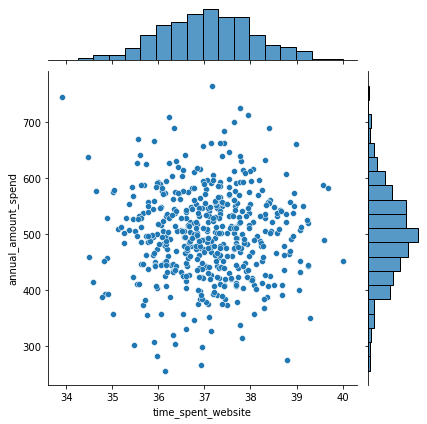

In [26]:
# namayeshe vabastegie byne 2 meghdare x, y 
sns.jointplot(data=customers, x='time_spent_website', y='annual_amount_spend')

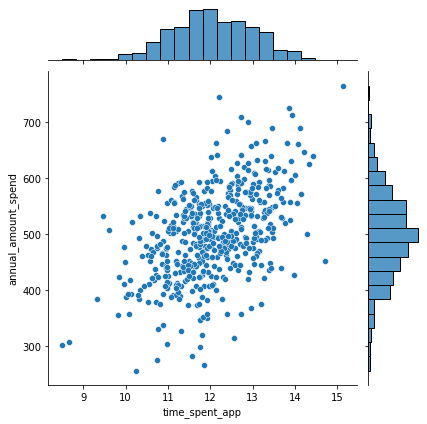

In [28]:
sns.jointplot(data=customers, x='time_spent_app', y='annual_amount_spend')

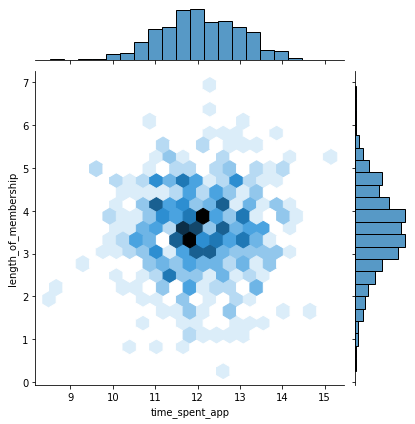

In [45]:
sns.jointplot(data = customers, x = 'time_spent_app', y = 'length_of_membership', kind='hex')

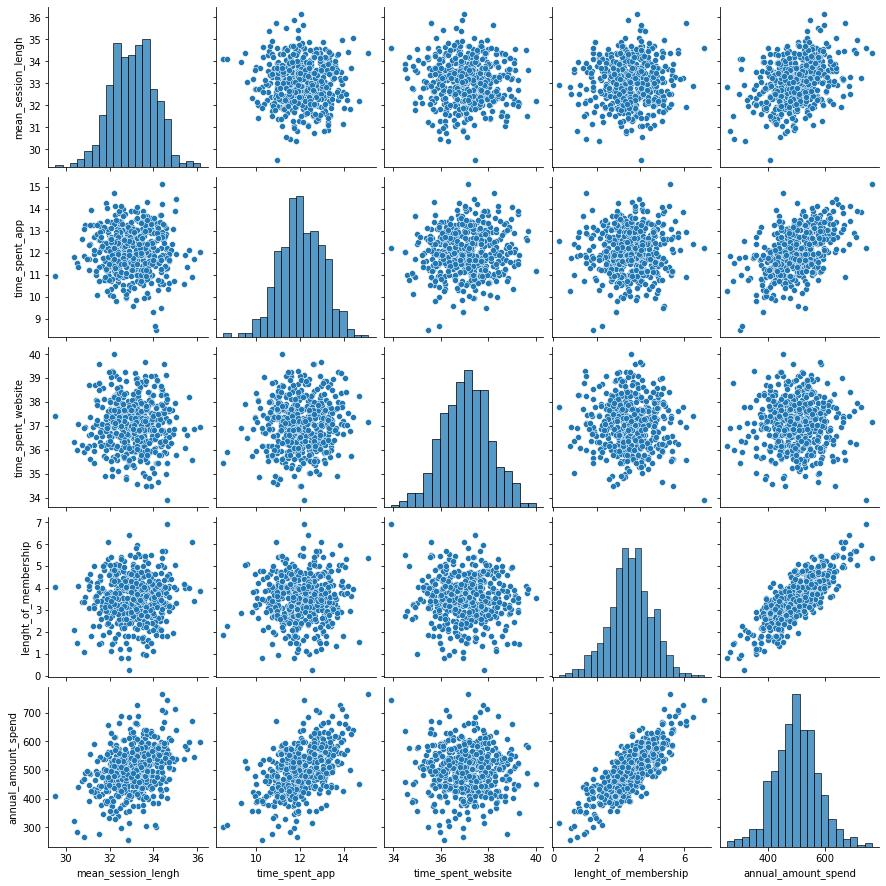

In [30]:
sns.pairplot(customers)

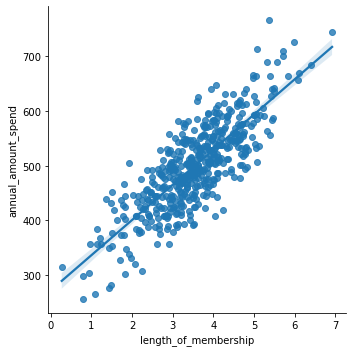

In [46]:
sns.lmplot(data = customers, x = 'length_of_membership', y ='annual_amount_spend')

In [47]:
# train kardane dade ha 
customers.columns

Index(['Email', 'Address', 'membership_image', 'mean_session_length',
       'time_spent_app', 'time_spent_website', 'length_of_membership',
       'annual_amount_spend'],
      dtype='object')

In [49]:
X =customers [['mean_session_length', 'time_spent_app', 'time_spent_website', 'length_of_membership']]

In [50]:
y = customers['annual_amount_spend']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) 

In [53]:
# fit kardane model 
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [55]:
lm.coef_

array([25.98154972, 38.59015875,  0.19040528, 61.27909654])

In [57]:
#predict kardane dade ha
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Values')

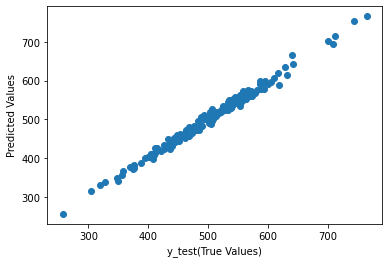

In [59]:
# namayeshe maghadire predict shode va True values dar yek plot
plt.scatter(y_test, predictions)
plt.xlabel('y_test(True Values)')
plt.ylabel('Predicted Values')

In [60]:
from sklearn import metrics

In [61]:
# namayeshe 3 meghdare mohasebatie asli model
print("MAE", metrics.mean_absolute_error(y_test, predictions))
print("MSE", metrics.mean_squared_error(y_test, predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE 7.228148653430817
MSE 79.81305165097412
RMSE 8.933815066978616


In [62]:
# mohasebeye variance model
metrics.explained_variance_score(y_test, predictions)

0.9890771231889607

C:\Users\Nima\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


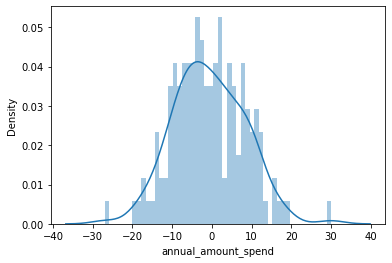

In [64]:
#baraye mohsasebeye baghimande ekhtelaf meghdare predict shode va True value 
sns.distplot((y_test - predictions), bins = 50);

In [67]:
# namayeshe tasirgozarie 4 field zir be annual_spend ke neshan midahad application daramad saz tar boode ta wbsite 
cdf = pd.DataFrame(lm.coef_,X.columns, columns=['Coeff'])
cdf

,Coeff
mean_session_length,25.981550
time_spent_app,38.590159
time_spent_website,0.190405
length_of_membership,61.279097


In [2]:
# GREAT JOB ;)